# **Projeto 2** 

# Integrantes
1.   Lucas Zillig
2.   Cesar Moura Leite Westphal
3.   Roberto Trocoli Neto






# **Introdução**

1. **Objetivo**

> O projeto 2 da matéria de Machine Learning Analytics nos apresenta com uma base de dados de informações sobre clientes de uma instituição financeira para a criação de um modelo preditivo utilizando as técnicas aprendidas durante o semestre. Esse modelo deve ser capaz de predizer se um cliente da instituição irá fazer um determinada transação no futuro.

2. **Método utilizado**

  * **Regressão Logística**:
  A regressão logística é um modelo estatístico que, em sua forma mais básica, utiliza um função logística para o mapeamento de variáveis binárias. Como estamos tentando predizer se um cliente fará uma transação ou não, portanto uma situação binária. Tendo em vista que a situação problema requer uma resposta positiva ou negativa (se o cliente efetuará determinada transação, ou não), o grupo achou mais adequada utilizar a implementação de Regressão Logística do Scikit Learn pelo fato da natureza binária do modelo

  * **Normalização**:
  Utilizamos a normalização devido ao fato da variação de intervalos em nosso dataset, fazendo com que todos os dados possam estar entre 0 e 1 e possibilitando que o modelo possa dar a mesma importância ao fazer o treinamento.
  * **Oversampling**:
  Oversampling é utilizado para o balanceamento do dataset, pegando a(s) classe(s) que estão menos presentes dentro da base de dados e criando exemplos para elas. Utilizamos essa ferramenta para possiblitar uma melhor generalização por parte do nosso modelo preditivo.
  





# **Imports**
  Parte do código onde importamos os suplementos utilizados na execução deste projeto.

In [1]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import io
import requests
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# **Aquisição e montagem dos dados**

In [2]:
url = "https://media.githubusercontent.com/media/fbarth/ml-espm/master/data/transacoes_financeiras_x_treinamento.csv"
s = requests.get(url).content
x = pd.read_csv("https://media.githubusercontent.com/media/fbarth/ml-espm/master/data/transacoes_financeiras_x_treinamento.csv")
url = "https://media.githubusercontent.com/media/fbarth/ml-espm/master/data/transacoes_financeiras_y_treinamento.csv"
s = requests.get(url).content
y = pd.read_csv("https://media.githubusercontent.com/media/fbarth/ml-espm/master/data/transacoes_financeiras_y_treinamento.csv")

In [3]:
x.head()

Unnamed: 0    var_0   var_1    var_2   var_3    var_4    var_5   var_6  \
0       68843  10.2517  4.9028   6.9554  9.2382   9.5082 -15.1127  5.5405   
1      153550   9.4850 -0.8717  13.3686  7.3311   9.8710   1.7328  6.0786   
2      193886  13.2760  3.8252  11.9382  6.2852   8.6824 -10.4823  5.1762   
3      124403  10.8655  5.7305   9.5254  6.0268   8.8997  -7.5331  7.1862   
4      129970  11.0408  3.4677  10.6452  6.4360  10.7789   2.5495  6.6891   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  14.8194 -3.3629  ...   3.2266  13.6146   2.2244   2.9162  25.3365   0.8673   
1  16.5134 -0.4101  ...  -4.1617   5.0044   4.0156   4.0156  15.1021  -1.4499   
2  14.3369 -2.3737  ...  -0.4447   5.5743   1.7776   5.9232  19.2590  -2.1834   
3  17.0452 -4.7029  ...  -5.2729   2.1546   2.2055   2.3202  16.3552  -1.7377   
4  13.4688 -2.8153  ...  -5.9665   2.0389   2.1086   6.2418  17.2595   0.4662   

   var_196  var_197  var_198  var_199  
0  12.6614   8.7353  22.5533  -9.7273  
1   0.0327   7.9507  13.4106  16.5787  
2   8.4182   8.0463  18.9604   7.0426  
3   6.4081   9.1220  16.9020 -15.2783  
4  -4.1719   7.7626  16.7837 -10.1988  

[5 rows x 201 columns]

In [4]:
y.head()

Unnamed: 0  target
0       68843       0
1      153550       0
2      193886       0
3      124403       0
4      129970       0

# **Análise Exploratória**

Esta seção apresenta o código utilizado para a análise exploratória do nosso dataset.

In [9]:
# Correlação entre as variáveis
df_cors = df.corr()

In [10]:
df_cors.head()

0         1         2         3         4         5         6    \
0  1.000000  0.000803  0.000944  0.005777 -0.001842 -0.002646  0.004463   
1  0.000803  1.000000  0.000818  0.007300  0.002679  0.001497  0.003933   
2  0.000944  0.000818  1.000000  0.005080  0.001559  0.001319  0.001430   
3  0.005777  0.007300  0.005080  1.000000  0.000741  0.000399  0.000454   
4 -0.001842  0.002679  0.001559  0.000741  1.000000 -0.000388  0.001401   

        7         8         9    ...       191       192       193       194  \
0  0.000939 -0.004839  0.002259  ...  0.001891 -0.001247 -0.000095 -0.000443   
1  0.004233  0.001586  0.005349  ...  0.005020  0.001910 -0.005138  0.002641   
2  0.001738  0.001944  0.002925  ...  0.007257  0.003350 -0.002159  0.002048   
3  0.000807  0.001146  0.002525  ... -0.000440  0.001118 -0.003095  0.000407   
4 -0.001314  0.002429  0.003016  ...  0.001145  0.003219 -0.003096 -0.002703   

        195       196       197       198       199       200  
0 -0.001044  0.000788  0.001771 -0.004488 -0.000883  0.003290  
1 -0.002639  0.004051  0.003552 -0.000340 -0.004092  0.006930  
2 -0.001869 -0.000919 -0.001717 -0.004517 -0.003359  0.001859  
3  0.002154 -0.001348  0.005202  0.002059 -0.000171  0.004811  
4 -0.001413  0.001839 -0.003764  0.000258 -0.001206 -0.001842  

[5 rows x 201 columns]

In [11]:
# Heatmap com correlação entre as variáveis
plt.figure(figsize = (200, 200))
sns.heatmap(data = df_cors, annot = True)

Text(0.5, 1.0, "Distribuição do 'target'")

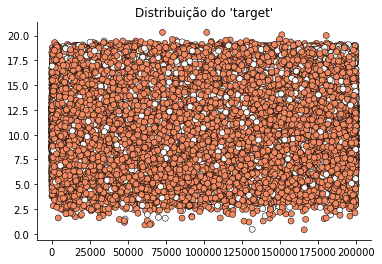

In [12]:
# Scatterplot da distribuição da variável dependente
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y.target]
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("Distribuição do 'target'")
# Podemos observar que o dataset está desbalanceado

In [13]:
y.groupby('target').count()

Unnamed: 0
target            
0           143806
1            16194

# **Pré processamento dos dados**
Esta seção se concentra em modificar o dataset para proporcionar o melhor aprendizado para o nosso modelo

In [5]:
# Normaliação das variáveis independentes
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [6]:
# Criação do DataFrame
df = pd.DataFrame(x_scaled)
df['target'] = y['target']
df.head()

0         1         2         3         4         5         6  \
0  0.344217  0.494474  0.785933  0.280711  0.700116  0.391425  0.350300   
1  0.767754  0.455959  0.558403  0.652794  0.555333  0.424993  0.688466   
2  0.969435  0.646399  0.743473  0.569805  0.475930  0.315016  0.443253   
3  0.622018  0.525308  0.818547  0.429818  0.456313  0.335122  0.502457   
4  0.649853  0.534114  0.729387  0.494787  0.487379  0.508998  0.704861   

          7         8         9  ...       192       193       194       195  \
0  0.523441  0.423850  0.326190  ...  0.840176  0.483842  0.480770  0.863717   
1  0.611648  0.499671  0.473415  ...  0.396539  0.633493  0.519178  0.325670   
2  0.463724  0.402254  0.375511  ...  0.425902  0.446513  0.585820  0.544208   
3  0.793210  0.523474  0.259379  ...  0.249704  0.482263  0.459948  0.391548   
4  0.711724  0.363399  0.353493  ...  0.243742  0.474167  0.596951  0.439090   

        196       197       198       199       200  target  
0  0.642790  0.826010  0.444843  0.821747  0.432427       0  
1  0.399742  0.437806  0.311439  0.359523  0.822994       0  
2  0.322806  0.695574  0.327694  0.640103  0.681411       0  
3  0.369555  0.633784  0.510593  0.536037  0.350012       0  
4  0.600720  0.308557  0.279457  0.530056  0.425427       0  

[5 rows x 202 columns]

In [7]:
# Transformação da variável dependente de numérica para categórica
df.target = df.target.astype('category')

In [8]:
# Transformando todos os atributos que apresentam somente dois valores de numéricos para  categóricos
for col in df.columns[:-1]:
    if df[col].nunique() == 2:
        df[col] = df[col].astype('category')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, df['target'], test_size = 0.2, random_state = 42)

Text(0.5, 1.0, 'Oversampling output')

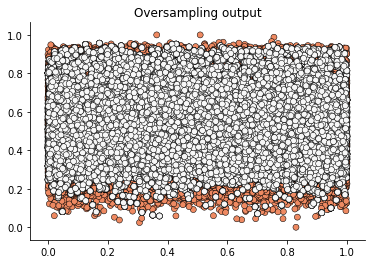

In [15]:
# Aplicação do Oversampling
ros = RandomOverSampler(random_state = 42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(x_resampled[:, 0], x_resampled[:, 1], c = colors, linewidths = 0.5, edgecolors = 'black')
sns.despine()
plt.title("Oversampling output")

# **Construção do Modelo**

Esta seção apresenta o código desenvolvido na construção do modelo

In [16]:
clf = LogisticRegression(random_state = 42, solver = 'saga', penalty = 'elasticnet', l1_ratio = 1).fit(x_resampled, y_resampled)

# **Conclusão**

1. **F1 Score**
  *  **Conceito:**
  Para entendermos o que é F1 Score, precisamos contextualizar as definições de Precision e Recall:
  * **Precision:** Precision é a métrica utilizada para se saber qual é a acurácia de um certo modelo. Esse valor é atingido através da divisão entre o número de verdadeiros positivos e o total de positivos predito (falso positivo + verdadeiro positivo).
  ![alt text](https://miro.medium.com/max/555/1*C3ctNdO0mde9fa1PFsCVqA.png)
  * **Recall:** Recall é a métrica utilizada para descobrir quantos dos exemplos positivos o modelo classificou de forma correta. Isso é feito através da divisão entre o verdadeiro positivo e o total de positivos (verdadeiro positivo + falso negativo)
  ![alt text](https://miro.medium.com/max/523/1*dXkDleGhA-jjZmZ1BlYKXg.png)
  * **F1 Score:** Finalmente, o F1 Score é utilizado quando buscamos um balanço entre Precision e Recall e, para que isso seja atingido, dividimos a multiplicação entre Precision e Recall sobre a adição entre essas duas mesmas métricas e tudo isso multiplicado por 2. Outro ponto importante é uqe o F1 Score é a melhor opção quando temos uma distribuição de classes desbalanceadas, o que é o nosso caso.     
  ![alt text](https://miro.medium.com/max/353/1*T6kVUKxG_Z4V5Fm1UXhEIw.png)

In [17]:
y_pred = clf.predict(x_test)
f1_score(y_test, y_pred)

0.410840468866905

In [18]:
confusion_matrix(y_test, y_pred)

array([[22442,  6359],
       [  728,  2471]], dtype=int64)

# **Validação do modelo**

In [19]:
X_teste = pd.read_csv('https://media.githubusercontent.com/media/fbarth/ml-espm/master/data/transacoes_financeiras_x_teste.csv')

In [20]:
X_teste_scaled = min_max_scaler.fit_transform(X_teste)
y_pred_teste = clf.predict(X_teste_scaled)

In [21]:
np.savetxt("y_pred.csv", y_pred_teste, delimiter=",")

In [22]:
unique, counts = np.unique(y_pred_teste, return_counts=True)
dict(zip(unique, counts))

{0: 31393, 1: 8607}